TriaMesh with regular Laplace-Beltrami
Solver: Cholesky decomposition from scikit-sparse cholmod ...
TriaMesh with regular Laplace-Beltrami
Solver: Cholesky decomposition from scikit-sparse cholmod ...


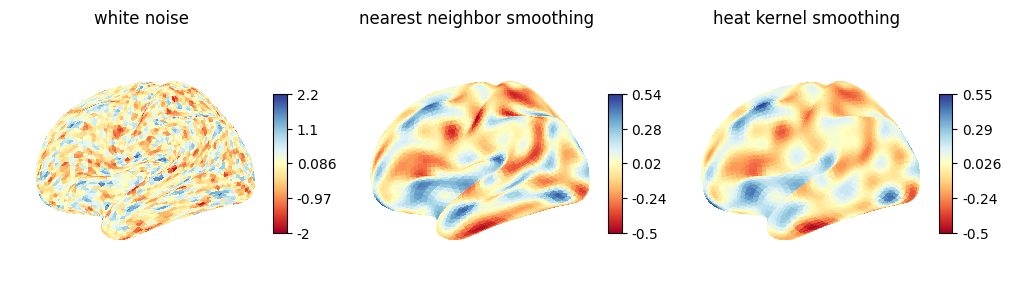

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from nilearn.plotting import plot_surf

from compare_brain_maps.utils import Surface
from compare_brain_maps.smoothing import NearestNeighborSmoother, HeatKernelSmoother

n_vertices = 4002
rng = np.random.default_rng(seed=0)
data = {"left": rng.standard_normal(n_vertices), "right": rng.standard_normal(n_vertices)}
X = Surface(data, atlas="fsLR", density="4k", surface="inflated")

# initialize smoothers with comparable smoothing parameters
nn_smoother = NearestNeighborSmoother(n_iterations=4)
hk_smoother = HeatKernelSmoother(sigma=26)

# apply smoothing
X_nn = nn_smoother.transform(X)
X_hk = hk_smoother.transform(X)

# plot brain maps
fig, axs = plt.subplots(ncols=3, figsize=(10, 3), subplot_kw=dict(projection="3d"), layout="constrained")
plot_surf_kwargs = dict(cmap="RdYlBu", darkness=None)
_ = plot_surf(surf_map=X, axes=axs[0], title="white noise", **plot_surf_kwargs)
_ = plot_surf(surf_map=X_nn, axes=axs[1], title="nearest neighbor smoothing", **plot_surf_kwargs)
_ = plot_surf(surf_map=X_hk, axes=axs[2], title="heat kernel smoothing", **plot_surf_kwargs)

Text(0.5, 1.0, 'right hemisphere')

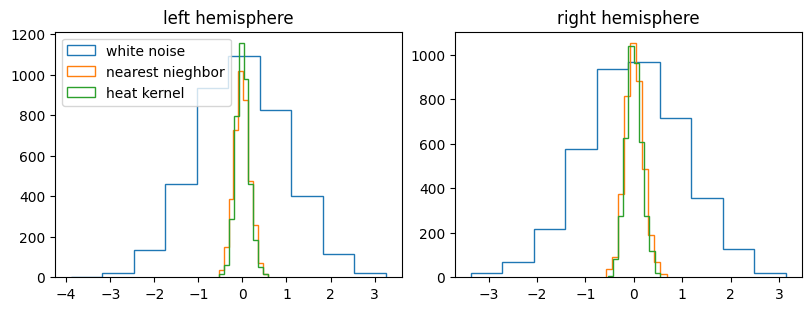

In [2]:
# plot data distributions
fig, axs = plt.subplots(ncols=2, figsize=(8, 3), layout="constrained")

hist_kwargs = dict(histtype="step")
axs[0].hist(X.data.parts["left"], label="white noise", **hist_kwargs)
axs[0].hist(X_nn.data.parts["left"], label="nearest nieghbor", **hist_kwargs)
axs[0].hist(X_hk.data.parts["left"], label="heat kernel", **hist_kwargs)
axs[0].legend(loc="upper left")
axs[0].set_title("left hemisphere")

axs[1].hist(X.data.parts["right"], **hist_kwargs)
axs[1].hist(X_nn.data.parts["right"], **hist_kwargs)
axs[1].hist(X_hk.data.parts["right"], **hist_kwargs)
axs[1].set_title("right hemisphere")